# Linear regression Gradient descent

In this example we will make the gradient descent from scratch using the batch gradient descent algorithm.
The coefficients will be compared to the ones resulting from the sklearn Linear regression.

$$
\begin{align*}
\text{Initialize:} \quad & \theta \text{ with random values} \\
\text{Set:} \quad & \alpha \text{ (learning rate)} \\
\text{Set:} \quad & \text{max\_iterations} \\
\text{Set:} \quad & \epsilon \text{ (convergence threshold)} \\
\text{Initialize:} \quad & i = 0 \\
\text{Repeat until convergence:} \\
& \text{Compute the gradient: } \nabla J(\theta) \\
& \text{Update the parameters: } \theta = \theta - \alpha \nabla J(\theta) \\
& \text{Increment } i \\
\text{End Repeat}
\end{align*}
$$

In [10]:
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

boston = load_boston()

In this exam

In [5]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
features = boston.feature_names
df_small = df[['RM', 'LSTAT']]
df2 = np.asarray(df_small)

First we develop and run the algorithm on the dataset that has only two features.
In this case the dataset is Boston Housing dataset.

In [88]:
#h(x) = b0 + b1 * x1 + b2 * x2
#loss =  (bo + b1 * x1 + b2 * x2 - y)**2
learning_rate = 0.1
#initilize the coefficients
b0 = 0.0
b1 = 0.0
b2 = 0.0

#function that calculates the gradient and updates the coefficients
def descent(b0, b1, b2, x1, x2, y, learning_rate):
    #inital values for the gradient
    dldb0 = 0.0
    dldb1 = 0.0
    dldb2 = 0.0
    for x1i, x2i, yi in zip(x1, x2, y):
        #for every sample in the training data calculate the gradient
        
        dldb0 += 2 * (b0 + b1 * x1i + b2 * x2i - yi)
        dldb1 += 2 * (x1i * (b0 + b1 * x1i + b2 * x2i  - yi))
        dldb2 += 2 * (x2i * (b0 + b1 * x1i + b2 * x2i  - yi))
    #after going through the whole set update 
    #the coefficents in the steepest descent direction
    b0 = b0 - learning_rate * dldb0 * (1/df.shape[0])
    b1 = b1 - learning_rate * dldb1 * (1/df.shape[0])
    b2 = b2 - learning_rate * dldb2 * (1/df.shape[0])
    #this should be repeated until convergence
    
    return b0, b1, b2

b0_values_gd = []
b1_values_gd = []
b2_values_gd = []


for epoch in range(100):
    b0, b1, b2 = descent(b0, b1,b2, df2[:,0] ,df2[:,1], boston.target, learning_rate)
    b0_values_gd.append(b0)
    b1_values_gd.append(b1)
    b2_values_gd.append(b2)
loss =  (np.sum((b0 + b1 * df2[:,0] + b2 * df2[:,1] - boston.target)**2)) * (1/df2.shape[0])
    
print("Final coefficients: b0 = {}, b1 = {}, b2 = {}".format(b0, b1, b2))
print("Final loss:", loss)

Final coefficients: b0 = 22.532806319520656, b1 = 3.576308838844548, b2 = -4.5824229609362055
Final loss: 30.512468797681883


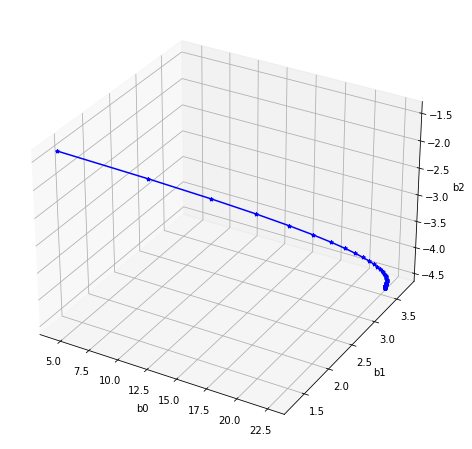

In [100]:
# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


# Plot the coefficients' path

ax.plot(b0_values_gd, b1_values_gd, b2_values_gd, color='blue', marker='*', markersize=4)
 

# Label axes
ax.set_xlabel('b0')
ax.set_ylabel('b1')
ax.set_zlabel('b2')

plt.show()

We can directly find the coefficients in the case of linear regression using the matrix operations as such:


$$
\begin{align*}
\text{Linear Model:} \quad & y = X\theta \\
\text{Cost Function (MSE):} \quad & J(\theta) = \frac{1}{2m}(X\theta - y)^T(X\theta - y) \\
\text{Gradient of Cost Function:} \quad & \nabla J(\theta) = X^T(X\theta - y) = 0 \\
\text{Normal Equation:} \quad & X^TX\theta = X^Ty \\
\text{Solve for } \theta: \quad & \theta = (X^TX)^{-1}X^Ty
\end{align*}
$$

In [21]:
coef = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(df_small), df_small)), np.transpose(df_small)),boston.target)
f"Final coefficients: b1 = {coef[0]}, b2 = {coef[]}"

'Final coefficients: b1 = 4.906906071447715, b2 = -0.6557399926392946'

### Stohastic gradient descent algorithm

Here we update the coefficients after each data point. Selecting it randomly and going through the set.
This method need a lot less calcualtions but is noisy and slower in the convergence to the minimum.

$$
\begin{align*}
\text{Initialize:} \quad & \theta \text{ with random values} \\
\text{Set:} \quad & \alpha \text{ (learning rate)} \\
\text{Set:} \quad & \text{max\_iterations} \\
\text{Set:} \quad & \epsilon \text{ (convergence threshold)} \\
\text{Initialize:} \quad & i = 0 \\
\text{Repeat until convergence:} \\
& \text{Randomly shuffle the training dataset} \\
& \text{for each training example } (x^{(i)}, y^{(i)}): \\
& \quad \text{Compute the gradient: } \nabla J^{(i)}(\theta) \\
& \quad \text{Update the parameters: } \theta = \theta - \alpha \nabla J^{(i)}(\theta) \\
& \text{Increment } i \\
\text{End Repeat}
\end{align*}
$$

In [97]:
m = df2.shape[0]
#h(x) = b0 + b1 * x1 + b2 * x2
#loss =  (bo + b1 * x1 + b2 * x2 - y)**2
learning_rate = 0.001
#initilize the coefficients
b0 = 0.0
b1 = 0.0
b2 = 0.0

#function that calculates the gradient and updates the coefficients
def descent(b0, b1, b2, x1, x2, y, learning_rate):
    #inital values for the gradient
    dldb0 = 0.0
    dldb1 = 0.0
    dldb2 = 0.0
    indices = np.arange(m)
    np.random.shuffle(indices)
    for i in indices:
        #for every sample in the training data calculate the gradient
        x1i = x1[i]
        x2i = x2[i]
        yi = y[i]
        dldb0 += 2 * (b0 + b1 * x1i + b2 * x2i - yi)
        dldb1 += 2 * (x1i * (b0 + b1 * x1i + b2 * x2i  - yi))
        dldb2 += 2 * (x2i * (b0 + b1 * x1i + b2 * x2i  - yi))
        #after going through the whole set update 
        #the coefficents in the steepest descent direction
        b0 = b0 - learning_rate * dldb0 * (1/m)
        b1 = b1 - learning_rate * dldb1 * (1/m)
        b2 = b2 - learning_rate * dldb2 * (1/m)
        #this should be repeated until convergence
    
    return b0, b1, b2
b0_values = []
b1_values = []
b2_values = []

for epoch in range(100):
    
    b0, b1, b2 = descent(b0, b1,b2, df2[:,0] ,df2[:,1], boston.target, learning_rate)
    b0_values.append(b0)
    b1_values.append(b1)
    b2_values.append(b2)
    
    loss =  (np.sum((b0 + b1 * df2[:,0] + b2 * df2[:,1] - boston.target)**2)) * (1/df2.shape[0])
print("Final coefficients: b0 = {}, b1 = {}, b2 = {}".format(b0, b1, b2))
print("Final loss:", loss)

Final coefficients: b0 = 22.563864591619666, b1 = 3.3373625526018724, b2 = -4.623578546488278
Final loss: 30.560115029280258


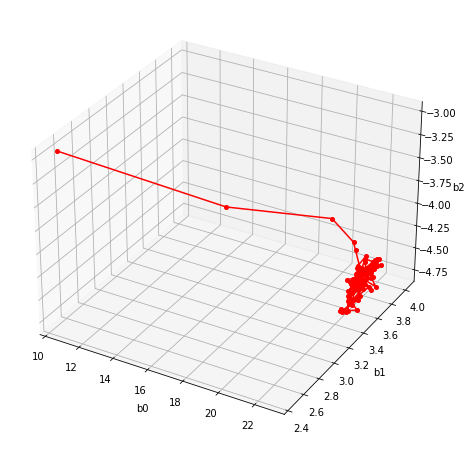

In [99]:
# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot the coefficients' path
ax.plot(b0_values, b1_values, b2_values, color='red', marker='o', markersize=4)
 

# Label axes
ax.set_xlabel('b0')
ax.set_ylabel('b1')
ax.set_zlabel('b2')

plt.show()